In [62]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/My\ Drive/UROP/project/UROP_project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/UROP/project/UROP_project


In [90]:
import numpy as np
import math
import glob
import utils

from parse import load_ps
from pprint import pprint
from scipy.signal import medfilt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report

In [92]:
files = utils.files_in_order('poses_compressed/squat')

X_train_names, X_test_names = train_test_split(files[5:16], test_size=0.2, random_state=42)
y_train = utils.get_labels(X_train_names)
y_test = utils.get_labels(X_test_names)

pprint(X_train_names)
pprint(y_train)
pprint(X_test_names)
pprint(y_test)

array(['squat_good_7.npy', 'squat_bad_8.npy', 'squat_bad_7.npy',
       'squat_good_5.npy', 'squat_good_1.npy', 'squat_good_4.npy',
       'squat_bad_9.npy', 'squat_good_3.npy'], dtype='<U17')
array([1, 0, 0, 1, 1, 1, 0, 1])
array(['squat_good_2.npy', 'squat_bad_6.npy', 'squat_good_6.npy'],
      dtype='<U17')
array([1, 0, 1])


In [93]:
def cal_vector_degree(array) : 
    output1 = [] # List of upper arm torso angles
    output2 = [] # List of forearm upper arm angles
    #for filename in names:
    # filter out data points where a part does not exist
    joints = [joint for joint in joints if all(part.exists for part in joint)]
        

In [116]:
import matplotlib.pyplot as plt

def plot_keypoints(x, y) :
    plt.scatter(x, y)
    plt.show()


In [115]:
def normalization(keypoints) :
  # keypoints.shape = [keypoints, frames, (x,y)]
  print(keypoints)

squat_good_7.npy
2.9750371393475996 3.5295884655072123
3.006686470617255 3.5667420283020252
3.006686470617255 4.086891907429404
3.2282317895048425 4.421273972582719
2.9750371393475996 4.532734660967157
3.006686470617255 5.573034419221914
2.9433878080779445 6.539027051887047
2.9750371393475996 3.4924349027124
2.9117384768082895 4.532734660967157
2.9750371393475996 5.573034419221914
2.9433878080779445 6.57618061468186


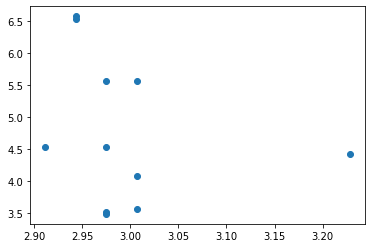

In [130]:
def calculate_change_keypoints(names, flag):
    PART_NAMES = ['neck',  'rshoulder', 'relbow', 'rwrist', 'rhip', 'rknee', 'rankle',
                 'lshoulder', 'lelbow', 'lwrist', 'lhip', 'lknee', 'lankle']
    
    result = []
    for filename in names:
        output = []
        x_array = []
        y_array = []

        if flag == 0: # flag 0 이면 기존 training, test 
            ps = load_ps('poses_compressed/squat/'+filename)
        else: # 1 flag 이면 새로 만든 값 (!! 수정필요)
            ps = load_ps('poses_compressed/squat/'+filename)
        
        poses = ps.poses
        
        for pose in poses : 
            x = []
            y = []

            for part in PART_NAMES :
                if getattr(pose, part).x < 0 : continue
                print(getattr(pose, part).x, getattr(pose, part).y)
                x.append(getattr(pose, part).x)
                y.append(getattr(pose, part).y)
                  
            x_array.append(x)
            y_array.append(y)
            #plot_keypoints(x_array, y_array)
            #return

        x_array = np.array(x_array)
        y_array = np.array(y_array)

        #output = np.array(output)
        #output = output.transpose(1, 0, 2)  
      
        #output = normalization(output)
        #output = cal_vector_change(np.array(output))

        #output = list(output)
    
        result.append(output)
 
    # print("LEN")
    # for l in result : 
    #  print(len(l))
    # print("END")
    result = np.array(result)

    # print("calculate")
    # print(result.shape)
    return result

print(X_train_names[0])
calculate_change_keypoints([X_train_names[0]], 0)

In [108]:
def KNN_with_keypoints(X_trains, X_test):
    predictions = []
    train_d_vectors = calculate_change_keypoints(X_train_names, 0)
    test_d_vector   = calculate_change_keypoints([X_test], 1)
    
    good, bad = [[] for i in range(2)]

    for idx, train_d_vector in enumerate(train_d_vectors): # X_test_names
        # Store the average distance to good and bad training examples
        #print("SHAPE")
        #print(len(train_d_vector)
        #print(len(test_d_vector))
        #print(train_d_vector)
        #print(test_d_vector)
        #test_d_vector = test_d_vector.reshape(-1, 1)
        
        dist = utils.DTWDistance(train_d_vector, test_d_vector[0])
        
        if y_train[idx]:
            good.append(dist)
        else:
            bad.append(dist)
              
        # if len(good) == 0 : good = [0]
        # if len(bad) == 0 : bad = [0]
        
    # 평가시 Train에 good, bad를 모두 넣어줘야함 
    good_score = np.mean(good)
    bad_score  = np.mean(bad)
    
    print(good_score, bad_score)
    
    #print(good_score, bad_score)
    # dist가 크면 덜 가깝다 -> bad score가 크면 good에 가깝다
    if good_score < bad_score:
        return 1
    else:
        return 0
    
result = []
for X_test_name in X_test_names :
    print(X_test_name, end=" ")
    test_label = KNN_with_keypoints(X_test_names, X_test_name) # 기존 test data 
    print(test_label)
    
    result.append([X_test_name, test_label])

squat_good_2.npy 48.282622896823895 45.121173564350435
0
squat_bad_6.npy 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


37.881632214106354 24.206688283813047
0
squat_good_6.npy 48.141921326640826 31.768515039880953
0


In [107]:
print("## TRAIN SET ##")
for i in range(len(X_train_names)) : 
    print(X_train_names[i], end = " ")
    if y_train[i] == 1 :
        print("Good")
    else :
        print("Bad")
        
        
print("\n## TEST RESULT ##")
for r in result : 
    ori_result = r[0].split("_")[1]
    
    print(r[0], end = " ")
    if r[1] == 1 :
        print("Good", end = " ")
    else :
        print("Bad", end = " ")

    if ori_result == 'good' and r[1] == 1 : 
        print("Right")  
    
    elif ori_result == 'bad' and r[1] == 0 : 
        print("Right")
        
    else : print("Wrong")

## TRAIN SET ##
squat_good_7.npy Good
squat_bad_8.npy Bad
squat_bad_7.npy Bad
squat_good_5.npy Good
squat_good_1.npy Good
squat_good_4.npy Good
squat_bad_9.npy Bad
squat_good_3.npy Good

## TEST RESULT ##
squat_good_2.npy Bad Wrong
squat_bad_6.npy Bad Right
squat_good_6.npy Bad Wrong
